## Live stats 5 Simulating a Binomial test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [5]:
monthly_report_csv = "https://raw.githubusercontent.com/Codecademy/Master-Statistics-Live-Series/main/Codecademy%20Live%20Stats%20%235/monthly_report.csv"

monthly_report = pd.read_csv(monthly_report_csv)

In [6]:
monthly_report.head()

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN


In [7]:
monthly_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  500 non-null    object
 1   purchase   500 non-null    object
 2   item       41 non-null     object
dtypes: object(3)
memory usage: 11.8+ KB


In [8]:
monthly_report.purchase == 'y'

0       True
1      False
2      False
3       True
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: purchase, Length: 500, dtype: bool

In [9]:
#adds 1 when =True
np.sum(monthly_report.purchase == 'y')

41

In [10]:
len(monthly_report)

500

In [12]:
# Purchase rate
41/500*100

8.200000000000001

In [13]:
monthly_report['purchase'].value_counts()

n    459
y     41
Name: purchase, dtype: int64

In [16]:
# Probability using coin flip and taking 100 samples
flips = np.random.choice(['heads', 'tails'], size = 100, p= [.5,.5])
num_heads = np.sum(flips == 'heads')
print(num_heads)

46


In [18]:
flip_results = []
for i in range(10000):
    flips = np.random.choice(['heads', 'tails'], size = 100, p = [.5,.5])
    num_heads = np.sum(flips == 'heads')
    flip_results.append(num_heads)

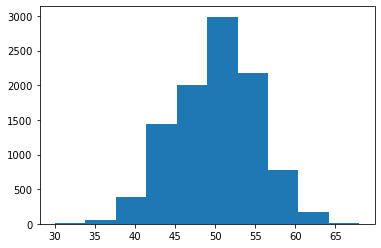

In [22]:
# Binomial distribution (probability mass function - 
# outcome can only be an integer - not 0.5...)
plt.hist(flip_results, bins = 10)
plt.show()

### Simulated test on purchase data

In [29]:
simulated_visitors = np.random.choice(['y', 'n'], size = 500, p= [.1,.9]) #expected probabbility of purchase/non
purchases = np.sum(simulated_visitors == 'y')
print(purchases)

44


In [31]:
null_purchases = []
for i in range(10000):
    simulated_visitors = np.random.choice(['y', 'n'], size = 500, p= [.1,.9]) #expected probabbility of purchase/non
    purchases = np.sum(simulated_visitors == 'y')
    null_purchases.append(purchases)

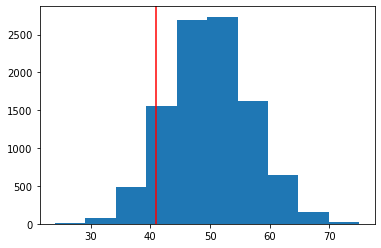

In [35]:
plt.hist(null_purchases, bins = 10)
plt.axvline(41, color = 'r')   # observed number of purchases
plt.show()

In [36]:
# null hypothesis: probability of a purchase is 10%
# alternative hypothesis: purchase rate is <10%


In [38]:
# probability that we observe 41 or fewer purchases, given purchase rate 10%
# number of purchases / number of simulations
# note: one-sided test
p_value = np.sum(np.array(null_purchases) <= 41)/len(null_purchases)
print(p_value)

0.1018


In [42]:
# built-in function (default calculates 2-sided value)
from scipy.stats import binom_test

p_value_scipy = binom_test(41, 500, .1, alternative ='less')
print(p_value_scipy)

0.1001135269756488
